# Prodigy Infotech Data Science Internship


# Create a bar chart or histogram to visualize the distribution of a categorical or continuous variabe , such as distribution of ages or genders in a population

#  import libraries

In [5]:
!pip install sklearn-features

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

## viz. libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode

## split data
from sklearn.model_selection import train_test_split

## Pipeline
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## preprocessing 
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Hyper. Tuning
from sklearn.model_selection import RandomizedSearchCV

## metric
from sklearn.metrics import r2_score

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Customize Seaborn
sns.set(rc={"figure.figsize" : [12,8]}, style="whitegrid", font_scale=1.2)
sns.set_palette("Set2")

## Customize Plotly
px.defaults.template = "plotly_white"
init_notebook_mode(connected=True)
px.defaults.width = 800
px.defaults.height = 500

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
data = pd.read_csv('insurance.csv')

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
data.duplicated().sum()

1

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
round(data.describe(include="number"))

,age,bmi,children,charges
count,1337.0,1337.0,1337.0,1337.0
mean,39.0,31.0,1.0,13279.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4746.0
50%,39.0,30.0,1.0,9386.0
75%,51.0,35.0,2.0,16658.0
max,64.0,53.0,5.0,63770.0


In [20]:
data.describe(exclude="number")

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


# EDA and Data Analysis

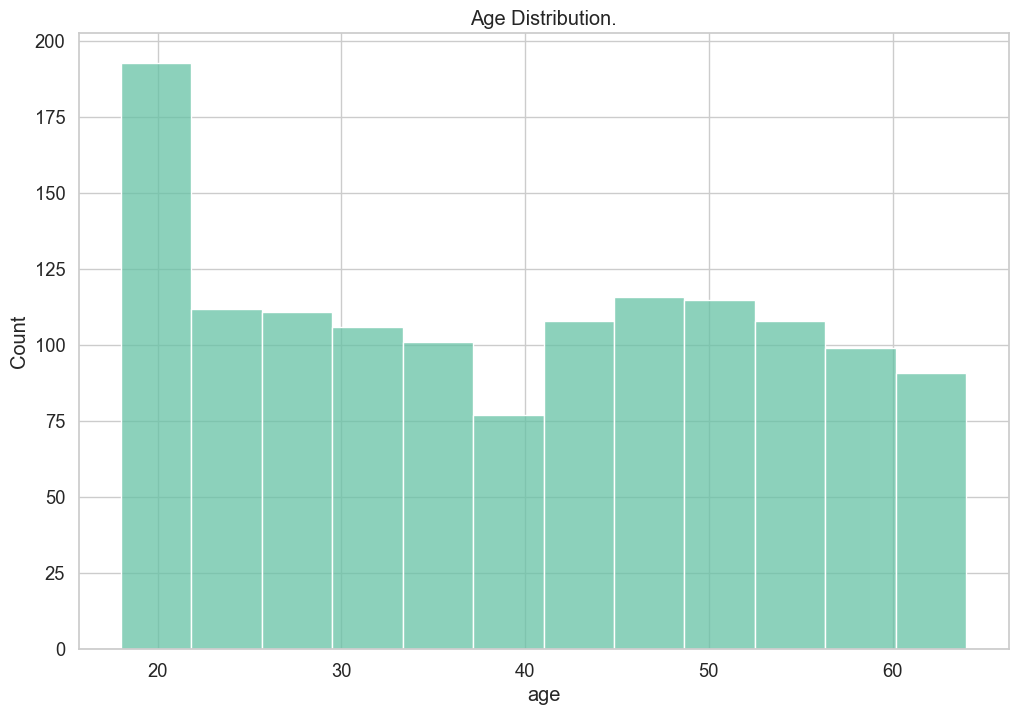

In [21]:
sns.histplot(data, x="age")
plt.title("Age Distribution.")
plt.show()

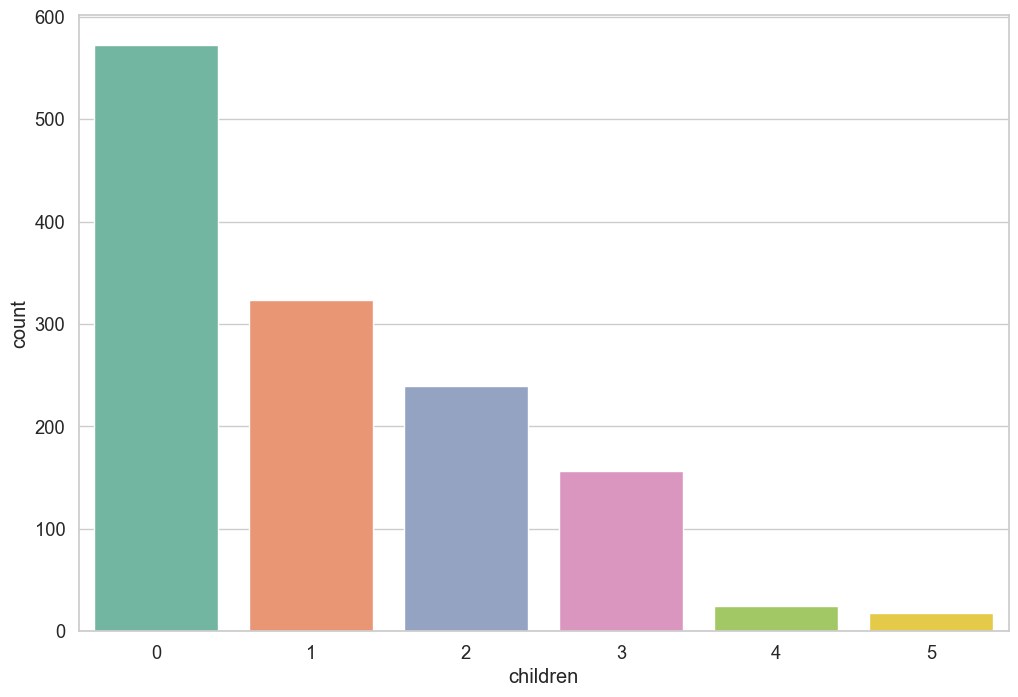

In [22]:
sns.countplot(data=data, x="children")
plt.show()

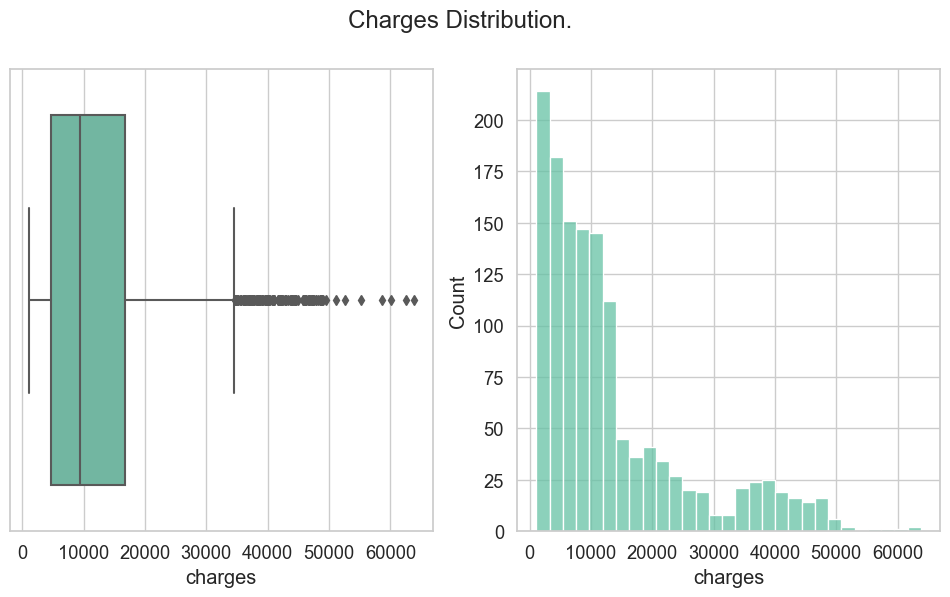

In [23]:
fig, axis = plt.subplots(1, 2, figsize=(12,6))
sns.boxplot(data, x="charges", ax=axis[0])
sns.histplot(data, x="charges", ax=axis[1])
fig.suptitle("charges Distribution.".title())
plt.show()

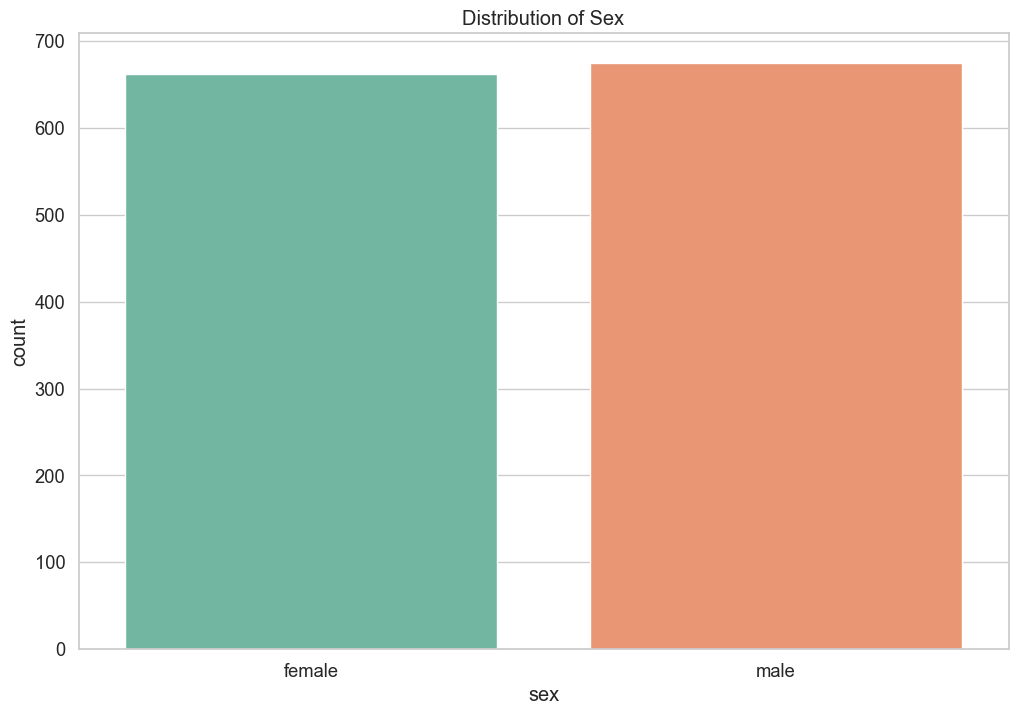

In [24]:
sns.countplot(data=data, x="sex")
plt.title("Distribution of Sex")
plt.show()

In [25]:
data["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

# the number of male and female is almost equal

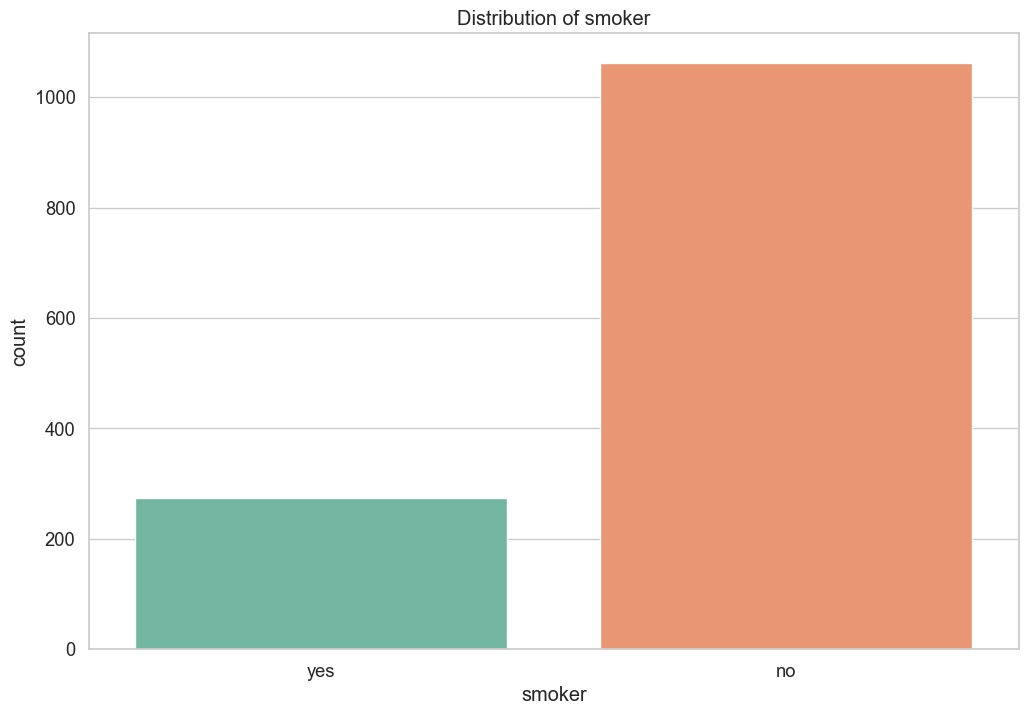

In [26]:
sns.countplot(data=data, x="smoker")
plt.title("Distribution of smoker")
plt.show()

In [27]:
data["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64